# Project Overview

We have been contacted by an online women's clothing shop to assist them in making informed decisions regarding the product categories featured on their website, focusing on customer satisfaction. The shop offers five clothing categories: Tops, Bottoms, Jackets, Dresses, and Intimate. 

**Our task is to determine which category has higher customer satisfaction.** 

The shop has not maintained records of customer ratings, and the only available data consists of customer reviews in text format.

Our approach involves cleaning and preprocessing the raw text reviews using Python NLTK, followed by conducting sentiment analysis to assess customer satisfaction across product categories. Through this systematic approach, we aim to provide the client with valuable insights that will aid them in optimizing their product offerings and overall customer experience.

**Task 1:** Loading the Customer Reviews Dataset

**Task 2:** Clean and Preprocess the Reviews

**Task 3:** Tokenize the Reviews and Removing Stopwords

**Task 4:** Exploring the Tokens and Product Categories

**Task 5:** Extracting the Adjectives in the Reviews

**Task 6:** Finding the Sentiment of each Review

In [42]:
# Importing Libraries

import pandas as pd
import string

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.sentiment import SentimentIntensityAnalyzer

from wordcloud import WordCloud
import plotly.express as px
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\danyv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\danyv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\danyv\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\danyv\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Task 1: Loading the Dataset

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df.head()

,product_review,product_category
0,"I love, love, love this jumpsuit. it's fun, fl...",Bottoms
1,Beautifully made pants and on trend with the f...,Bottoms
2,I never would have given these pants a second ...,Bottoms
3,These pants are even better in person. the onl...,Bottoms
4,The silhouette and length of this skirt and le...,Bottoms


In [6]:
df.shape

(3376, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   product_review    3376 non-null   object
 1   product_category  3376 non-null   object
dtypes: object(2)
memory usage: 52.9+ KB


In [8]:
# Check the number of reviews per product category
df['product_category'].value_counts()

product_category
Bottoms     685
Dresses     681
Tops        680
Jackets     680
Intimate    650
Name: count, dtype: int64

- Our Dataset has 2 columns (product_review, and product_category), and 3376 rows, with no null values.

- The majority of product reviews are in the 'Bottoms' product_category, followed by Dresses, Tops, Jackets and Intimate

## Task 2: Clean and Preprocess the Reviews

**- Lower casing**

**- Remove punctuation**

In [12]:
# Converting to lowercase
df['product_review'] = df['product_review'].str.lower()

# Removing punctuation
df['product_review'] = df['product_review'].str.translate(str.maketrans('', '', string.punctuation))

# Check changes
df.head()

,product_review,product_category
0,i love love love this jumpsuit its fun flirty ...,Bottoms
1,beautifully made pants and on trend with the f...,Bottoms
2,i never would have given these pants a second ...,Bottoms
3,these pants are even better in person the only...,Bottoms
4,the silhouette and length of this skirt and le...,Bottoms


- Upper and lower case is used to meet grammatical correctness and they do not convey any special meaning. So one can simply convert everything to lower case as a part of preprocessing.

- **Punctuation and special characters** often don’t carry significant semantic meaning on their own. Removing them can help reduce the noise in the text and make it easier for NLP models to focus on the meaningful words and phrases. Ignoring punctuations and special characters helps NLP models generalize better.

## Task 3: Tokenize the Review and Removing Stopwords

In [14]:
# Tokenize the 'product_review'
df['tokenized'] = df['product_review'].apply(nltk.word_tokenize)

# Remove Stopwords
english_stopwords = stopwords.words('english')
english_stopwords.extend(['in', 'its', 'every', 'dont'])
english_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [19]:
# Create a function to remove all the stopwords
def remove_stopwords(tokens):
    return [t for t in tokens if t not in english_stopwords]

# Apply the function
df['cleaned_tokens'] = df['tokenized'].apply(remove_stopwords)


df.head()

,product_review,product_category,tokenized,cleaned_tokens
0,i love love love this jumpsuit its fun flirty ...,Bottoms,"[i, love, love, love, this, jumpsuit, its, fun...","[love, love, love, jumpsuit, fun, flirty, fabu..."
1,beautifully made pants and on trend with the f...,Bottoms,"[beautifully, made, pants, and, on, trend, wit...","[beautifully, made, pants, trend, flared, crop..."
2,i never would have given these pants a second ...,Bottoms,"[i, never, would, have, given, these, pants, a...","[never, would, given, pants, second, look, onl..."
3,these pants are even better in person the only...,Bottoms,"[these, pants, are, even, better, in, person, ...","[pants, even, better, person, downside, need, ..."
4,the silhouette and length of this skirt and le...,Bottoms,"[the, silhouette, and, length, of, this, skirt...","[silhouette, length, skirt, length, flattering..."


In [20]:
# Let's recreate the phrase without stopwords
df['product_review_cleaned'] = df['cleaned_tokens'].apply(lambda x: ' '.join(x))

df.head()

,product_review,product_category,tokenized,cleaned_tokens,product_review_cleaned
0,i love love love this jumpsuit its fun flirty ...,Bottoms,"[i, love, love, love, this, jumpsuit, its, fun...","[love, love, love, jumpsuit, fun, flirty, fabu...",love love love jumpsuit fun flirty fabulous ti...
1,beautifully made pants and on trend with the f...,Bottoms,"[beautifully, made, pants, and, on, trend, wit...","[beautifully, made, pants, trend, flared, crop...",beautifully made pants trend flared crop much ...
2,i never would have given these pants a second ...,Bottoms,"[i, never, would, have, given, these, pants, a...","[never, would, given, pants, second, look, onl...",never would given pants second look online per...
3,these pants are even better in person the only...,Bottoms,"[these, pants, are, even, better, in, person, ...","[pants, even, better, person, downside, need, ...",pants even better person downside need dry cle...
4,the silhouette and length of this skirt and le...,Bottoms,"[the, silhouette, and, length, of, this, skirt...","[silhouette, length, skirt, length, flattering...",silhouette length skirt length flattering clas...


In natural language processing (NLP), **stopwords** are frequently filtered out to enhance text analysis and computational efficiency. Eliminating stopwords can improve the accuracy and relevance of NLP tasks by drawing attention to the more important words, or content words.

## Task 4: Exploring the Tokens and Product Categories

In [21]:
df['product_category'].value_counts()

product_category
Bottoms     685
Dresses     681
Tops        680
Jackets     680
Intimate    650
Name: count, dtype: int64

In [22]:
# Let's analyze the tokens frequency based on category
tops_tokens = []

for x in df[df['product_category'] == 'Tops'].cleaned_tokens:
    tops_tokens.extend(x)
    
len(tops_tokens)

18456

In [23]:
# Let's find the 20 most common words in the Tops category
freq_dist = FreqDist(tops_tokens)
freq_dist.most_common(20)

[('love', 337),
 ('top', 334),
 ('wear', 233),
 ('great', 229),
 ('size', 211),
 ('color', 185),
 ('shirt', 172),
 ('fit', 167),
 ('im', 149),
 ('perfect', 146),
 ('small', 141),
 ('like', 140),
 ('soft', 136),
 ('flattering', 128),
 ('little', 120),
 ('one', 119),
 ('sweater', 118),
 ('fits', 112),
 ('bought', 111),
 ('well', 109)]

In [35]:
all_tokens = []

for x in df[df['product_category'] == 'Dresses'].cleaned_tokens:
    all_tokens.extend(x)

freq_dist = FreqDist(all_tokens)
freq_dist.most_common(20)

[('dress', 1062),
 ('like', 321),
 ('fabric', 254),
 ('would', 220),
 ('size', 207),
 ('fit', 207),
 ('back', 166),
 ('look', 157),
 ('really', 154),
 ('love', 152),
 ('im', 146),
 ('ordered', 146),
 ('material', 139),
 ('small', 128),
 ('looks', 119),
 ('looked', 118),
 ('much', 111),
 ('also', 106),
 ('top', 105),
 ('wear', 105)]

In [36]:
all_tokens = []

for x in df[df['product_category'] == 'Bottoms'].cleaned_tokens:
    all_tokens.extend(x)

freq_dist = FreqDist(all_tokens)
freq_dist.most_common(20)

[('fit', 371),
 ('size', 340),
 ('love', 324),
 ('great', 247),
 ('skirt', 235),
 ('wear', 225),
 ('pants', 218),
 ('perfect', 197),
 ('im', 195),
 ('like', 192),
 ('jeans', 182),
 ('look', 160),
 ('comfortable', 158),
 ('color', 154),
 ('waist', 125),
 ('pair', 117),
 ('nice', 115),
 ('flattering', 113),
 ('really', 111),
 ('little', 108)]

By observing the most common 20 words present in the reviews of the various product categories, we notice how the main words are very positive. In fact, in almost all types of products, one of the most used words is "Love".

## Task 5: Extracting the Adjectives used in the Reviews

### Part of Speech Tagging

The grammatical role of a word in a sentence. A part of speech is one of the nine types of English words: VERB, NOUN, ADJECTIVE, ADVERB, PRONOUN, PREPOSITION, DETERMINER, CONJUCTION, INTERJECTION.

In [37]:
# Let's use 'pos_tag' to assign a part of speech to all tokens of all the Reviews
df['POS_tokens'] = df['tokenized'].apply(nltk.pos_tag)

In [38]:
df.head()

,product_review,product_category,tokenized,cleaned_tokens,product_review_cleaned,POS_tokens
0,i love love love this jumpsuit its fun flirty ...,Bottoms,"[i, love, love, love, this, jumpsuit, its, fun...","[love, love, love, jumpsuit, fun, flirty, fabu...",love love love jumpsuit fun flirty fabulous ti...,"[(i, NN), (love, VBP), (love, NN), (love, NN),..."
1,beautifully made pants and on trend with the f...,Bottoms,"[beautifully, made, pants, and, on, trend, wit...","[beautifully, made, pants, trend, flared, crop...",beautifully made pants trend flared crop much ...,"[(beautifully, RB), (made, VBN), (pants, NNS),..."
2,i never would have given these pants a second ...,Bottoms,"[i, never, would, have, given, these, pants, a...","[never, would, given, pants, second, look, onl...",never would given pants second look online per...,"[(i, NN), (never, RB), (would, MD), (have, VB)..."
3,these pants are even better in person the only...,Bottoms,"[these, pants, are, even, better, in, person, ...","[pants, even, better, person, downside, need, ...",pants even better person downside need dry cle...,"[(these, DT), (pants, NNS), (are, VBP), (even,..."
4,the silhouette and length of this skirt and le...,Bottoms,"[the, silhouette, and, length, of, this, skirt...","[silhouette, length, skirt, length, flattering...",silhouette length skirt length flattering clas...,"[(the, DT), (silhouette, NN), (and, CC), (leng..."


In [39]:
# Let's extract the adjectives used in each review
def extract_adj(tokens):
    adjective = []
    for x in tokens:
        if x[1] in ['JJ', 'JJR', 'JJS']:
            adjective.append(x[0])
    return adjective

df['adjectives'] = df.POS_tokens.apply(extract_adj)
df.head()

,product_review,product_category,tokenized,cleaned_tokens,product_review_cleaned,POS_tokens,adjectives
0,i love love love this jumpsuit its fun flirty ...,Bottoms,"[i, love, love, love, this, jumpsuit, its, fun...","[love, love, love, jumpsuit, fun, flirty, fabu...",love love love jumpsuit fun flirty fabulous ti...,"[(i, NN), (love, VBP), (love, NN), (love, NN),...","[fabulous, i, great]"
1,beautifully made pants and on trend with the f...,Bottoms,"[beautifully, made, pants, and, on, trend, wit...","[beautifully, made, pants, trend, flared, crop...",beautifully made pants trend flared crop much ...,"[(beautifully, RB), (made, VBN), (pants, NNS),...","[flared, much]"
2,i never would have given these pants a second ...,Bottoms,"[i, never, would, have, given, these, pants, a...","[never, would, given, pants, second, look, onl...",never would given pants second look online per...,"[(i, NN), (never, RB), (would, MD), (have, VB)...","[second, much, cuter, right, small, loose, navy]"
3,these pants are even better in person the only...,Bottoms,"[these, pants, are, even, better, in, person, ...","[pants, even, better, person, downside, need, ...",pants even better person downside need dry cle...,"[(these, DT), (pants, NNS), (are, VBP), (even,...","[only, dry]"
4,the silhouette and length of this skirt and le...,Bottoms,"[the, silhouette, and, length, of, this, skirt...","[silhouette, length, skirt, length, flattering...",silhouette length skirt length flattering clas...,"[(the, DT), (silhouette, NN), (and, CC), (leng...","[classic, comfortable, favorite, different, hi..."


In [40]:
# Let's combine all the adjective in one big sentence for the Tops
adj_tops = ''

for x in df[df['product_category'] == 'Tops'].adjectives:
    adj_tops += ' '.join(x) + ' '

adj_tops

'flattering due adjustable perfect cardigan last i pale gorgeous little hte ejans i glad i white crisp clean i great perfect wear cant wrong wasnt seethrough white careful i great comfy classic quirky beautiful practical cropped boxy perfect longer camisole little thin small gorgeous unsnapped skinny true great casual flare grey back nice beautiful ordinary usual tight chest i cute plaid great local comfortable bad little dressier small black top comfortable comfortable good perfect roomy warm cute collar beautiful unique busty top small wouldve fit better adorable bib favorite small perfect soft comfortable unusual asymmetrical front visual little ive adorable i comfortable feminine great dark perfect wish happy comfortable flattering comfortable light top lovely floral great white top happy top online little i little large petite longer regular perfect give soft comfortable short much uncomfortable doesnt easier navy boxy whole cute more fabric i super read same specific petite weigh

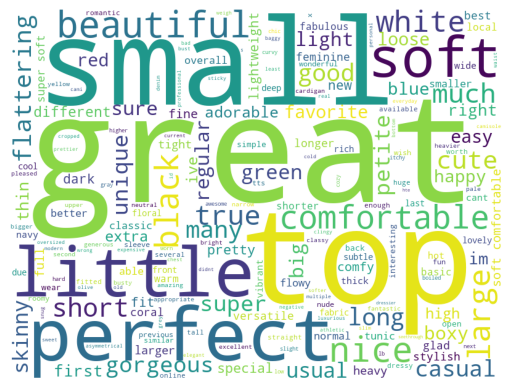

In [45]:
# Let's visualize the adjectives using a Word Cloud
from wordcloud import WordCloud

word_cloud = WordCloud(width = 800,
                       height = 600,
                       background_color = 'white').generate(adj_tops)
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

In [46]:
# Function to create a Word Cloud based on Category
def visualize_adj(category):
    adjectives = ''
    
    for x in df[df['product_category'] == category].adjectives:
        adjectives += ' '.join(x) + ' '
        
    wordcloud = WordCloud(width = 800,
                       height = 600,
                       background_color = 'white').generate(adjectives)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

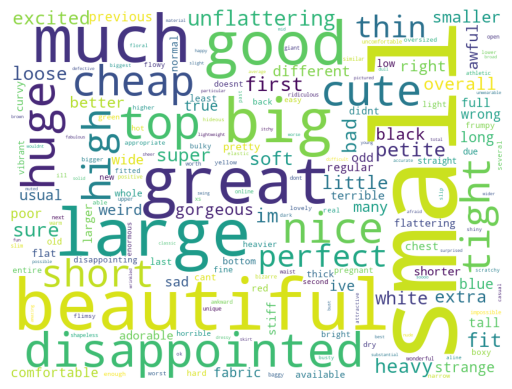

In [48]:
visualize_adj('Dresses')

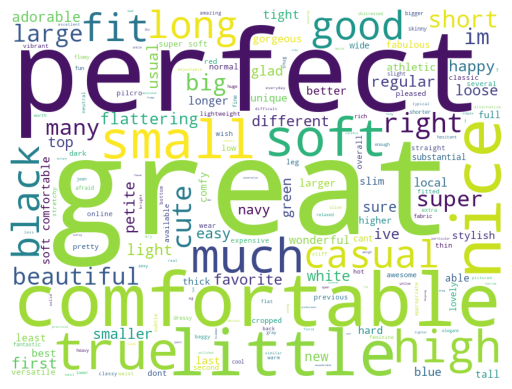

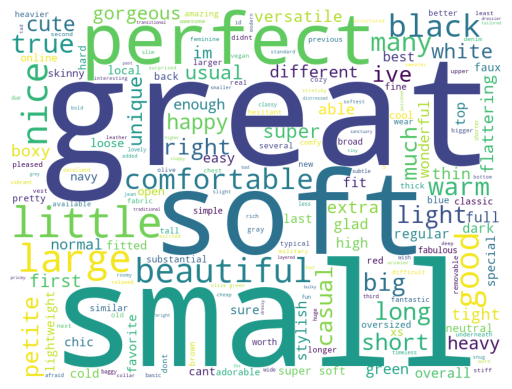

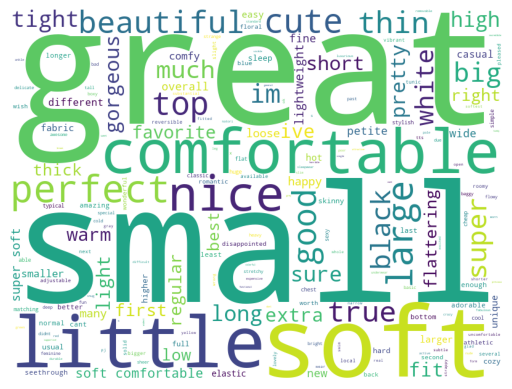

In [50]:
visualize_adj('Bottoms')
visualize_adj('Jackets')
visualize_adj('Intimate')

The **word cloud** allows you to identify the relative frequency of different keywords using an easily digestible visual.

The bigger words in the chart appear more often in responses relative to the other words. In this case, these words tend to be positive—e.g. “great”, “beautiful” and “perfect.”

## Task 6: Finding the Sentiment of each Review

In [51]:
#Function to define polarity for each review
def polarity_score(review):
    #Initializing the Sentiment Analyzer
    sent = SentimentIntensityAnalyzer()
    
    #Extracting the sentiment polarity scores of a review
    scores= sent.polarity_scores(review)
    
    #Getting the compound score
    compound = scores['compound']
    
    if compound > 0.05:
        return 'positive'
    elif compound < -0.05:
        return 'negative'
    else:
        return 'neutral'

In [53]:
df['sentiment'] = df['product_review_cleaned'].apply(polarity_score)
df.head()

,product_review,product_category,tokenized,cleaned_tokens,product_review_cleaned,POS_tokens,adjectives,sentiment
0,i love love love this jumpsuit its fun flirty ...,Bottoms,"[i, love, love, love, this, jumpsuit, its, fun...","[love, love, love, jumpsuit, fun, flirty, fabu...",love love love jumpsuit fun flirty fabulous ti...,"[(i, NN), (love, VBP), (love, NN), (love, NN),...","[fabulous, i, great]",positive
1,beautifully made pants and on trend with the f...,Bottoms,"[beautifully, made, pants, and, on, trend, wit...","[beautifully, made, pants, trend, flared, crop...",beautifully made pants trend flared crop much ...,"[(beautifully, RB), (made, VBN), (pants, NNS),...","[flared, much]",positive
2,i never would have given these pants a second ...,Bottoms,"[i, never, would, have, given, these, pants, a...","[never, would, given, pants, second, look, onl...",never would given pants second look online per...,"[(i, NN), (never, RB), (would, MD), (have, VB)...","[second, much, cuter, right, small, loose, navy]",positive
3,these pants are even better in person the only...,Bottoms,"[these, pants, are, even, better, in, person, ...","[pants, even, better, person, downside, need, ...",pants even better person downside need dry cle...,"[(these, DT), (pants, NNS), (are, VBP), (even,...","[only, dry]",positive
4,the silhouette and length of this skirt and le...,Bottoms,"[the, silhouette, and, length, of, this, skirt...","[silhouette, length, skirt, length, flattering...",silhouette length skirt length flattering clas...,"[(the, DT), (silhouette, NN), (and, CC), (leng...","[classic, comfortable, favorite, different, hi...",positive


In [54]:
# Let's creare a variable called 'data', where for each product category, we count the sentiment.
data = df.groupby(['product_category', 'sentiment']).size().reset_index(name = 'counts')
data

,product_category,sentiment,counts
0,Bottoms,negative,4
1,Bottoms,neutral,2
2,Bottoms,positive,679
3,Dresses,negative,95
4,Dresses,neutral,22
5,Dresses,positive,564
6,Intimate,negative,23
7,Intimate,neutral,14
8,Intimate,positive,613
9,Jackets,negative,4


In [67]:
# Let's Visualize the sentiment based on the product categories

fig = px.bar(data,
              x = 'product_category',
              y = 'counts',
              color = 'sentiment',
              barmode = 'group')
fig.show()

The overall sentiment for the products featured in the five categories is very positive.

The category with the most positive reviews is 'Bottoms', followed by 'Tops' and 'Jackets'. The categories with the fewest positive reviews are 'Dresses' and 'Intimates'.

Although the general sentiment is very positive, negative reviews are present in the 'Dresses' and 'Intimate' categories.

- Customer satisfaction is very high in the categories: Bottoms, Tops and Jackets. It is good to continue to offer quality products, and vary the range of colors and designs available.

- Customer satisfaction needs to be improved in the Dresses and Intimate categories.

**Next steps:**

- Do a more in-depth analysis on the problems encountered by some people in the Dresses and Intimate categories, trying to understand what is wrong with the products. This helps us improve customer satisfaction in these categories.

- Carry out an analysis of audience segmentation in order to create suitable offers based on the type of customer.